### US Aerospace Trade: Decade Overview
Posted on October 21, 2016 by BRYAN NOVY

How has the US aerospace industry fared on the global scale over the last decade? This article will take a look at the industry from 2006 to 2015, to see how it has grown, or how it weathered rough periods such as the 2008 financial crisis.

The aerospace industry is one of the most vibrant sectors of the US economy. The US exported billions of dollars worth of aircrafts and parts in 2015. This is in stark contrast to the image of the US as an importer nation with a shrinking manufacturing base. Not so for the aviation industry.

This article will examine the trade flows of two US aerospace commodities, aircraft/spacecraft and engine parts, over the last ten years. The UN publishes trade data for the US and most other nations on its Comtrade database. This is the source for the data in this article.

In [1]:
#Imports

import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

### Collect the Data

Download data from UN COMTRADE website. We need two csv files here because the COMTRADE site only allows you to aggregate a total of 5 years.

To access this data:

go to https://comtrade.un.org/ then select 'get trade data'

select ‘type of product: goods’,

‘frequency: annual’,

‘periods: 2006 2007 2008 2009 2010’,

‘reporter: USA’,

‘partners: world’,

‘flows: imports and exports’,

‘HS (as reported) commodity codes: 88, Aircraft, spacecraft, and parts thereof.  840710 Aircraft Engines, spark-ignition.’

Select the ‘Download CSV ‘ option to download the data set.

Clicking on ‘Preview’ results in a message that the data exceeds 500 rows.

Data was downloaded using the Download CSV button and the download file renamed appropriately.

Repeat same process for second half of decade
select ‘type of product: goods’,

‘frequency: annual’,

‘periods: 2011 2012 2013 2014 2015’,

‘reporter: USA’,

‘partners: world’,

‘flows: imports and exports’,

‘HS (as reported) commodity codes: 88, Aircraft, spacecraft, and parts thereof.  840710 Aircraft Engines, spark-ignition ’

Select the ‘Download CSV ‘ option to download the data set.

In [2]:
LOCATION1 = 'USaero06.csv'

In [3]:
LOCATION2 = 'USaero11.csv'

In [4]:
aero1 = read_csv(LOCATION1, dtype={'Commodity Code':str})
aero1

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,H3,2007,2007,2007,6,1,1,Import,842,USA,...,NaN,NaN,4731.0,NaN,NaN,NaN,77377730,NaN,NaN,0
1,H3,2007,2007,2007,6,1,2,Export,842,USA,...,NaN,NaN,41692.0,NaN,NaN,NaN,315655265,NaN,NaN,0
2,H3,2008,2008,2008,6,1,1,Import,842,USA,...,NaN,NaN,13180.0,NaN,710297.0,NaN,133747721,NaN,NaN,4
3,H3,2008,2008,2008,6,1,2,Export,842,USA,...,NaN,NaN,13502.0,NaN,1673813.0,NaN,256847038,NaN,NaN,4
4,H3,2009,2009,2009,6,1,1,Import,842,USA,...,NaN,NaN,4045.0,NaN,740000.0,NaN,136414993,NaN,NaN,4
5,H3,2009,2009,2009,6,1,2,Export,842,USA,...,NaN,NaN,6702.0,NaN,NaN,NaN,139441886,NaN,NaN,0
6,H3,2010,2010,2010,6,1,1,Import,842,USA,...,NaN,NaN,4921.0,NaN,668682.0,NaN,120495627,NaN,NaN,4
7,H3,2010,2010,2010,6,1,2,Export,842,USA,...,NaN,NaN,6132.0,NaN,601626.0,NaN,93432592,NaN,NaN,4
8,H3,2007,2007,2007,2,0,1,Import,842,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,21990599755,NaN,NaN,0
9,H3,2007,2007,2007,2,0,2,Export,842,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,75952356713,NaN,NaN,0


In [5]:
aero2 = read_csv(LOCATION2, dtype={'Commodity Code':str})
aero2

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,H4,2012,2012,2012,6,1,1,Import,842,USA,...,NaN,NaN,6200.0,NaN,595570.0,NaN,123099233,NaN,NaN,4
1,H4,2012,2012,2012,6,1,2,Export,842,USA,...,NaN,NaN,3850.0,NaN,365291.0,NaN,66334051,NaN,NaN,4
2,H4,2013,2013,2013,6,1,1,Import,842,USA,...,NaN,NaN,5754.0,NaN,520152.0,NaN,107511013,NaN,NaN,4
3,H4,2013,2013,2013,6,1,2,Export,842,USA,...,NaN,NaN,4046.0,NaN,865301.0,NaN,157132286,NaN,NaN,4
4,H4,2014,2014,2014,6,1,1,Import,842,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,63666087,NaN,NaN,0
5,H4,2014,2014,2014,6,1,2,Export,842,USA,...,NaN,NaN,NaN,NaN,884549.0,NaN,187930343,NaN,NaN,4
6,H4,2015,2015,2015,6,1,1,Import,842,USA,...,NaN,NaN,4861.0,NaN,NaN,NaN,59134671,NaN,NaN,0
7,H4,2015,2015,2015,6,1,2,Export,842,USA,...,NaN,NaN,2175.0,NaN,804415.0,NaN,145367792,NaN,NaN,4
8,H4,2012,2012,2012,2,0,1,Import,842,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,24411528354,NaN,NaN,0
9,H4,2012,2012,2012,2,0,2,Export,842,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,104440079691,NaN,NaN,0


In [6]:
COLUMNS = ['Year', 'Period', 'Trade Flow', 'Reporter', 'Partner', 'Commodity', 'Commodity Code', 'Trade Value (US$)']
aero1 = aero1[COLUMNS]

In [7]:
aero1

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
0,2007,2007,Import,USA,World,Spark-ignition reciprocating/rotary internal c...,840710,77377730
1,2007,2007,Export,USA,World,Spark-ignition reciprocating/rotary internal c...,840710,315655265
2,2008,2008,Import,USA,World,Spark-ignition reciprocating/rotary internal c...,840710,133747721
3,2008,2008,Export,USA,World,Spark-ignition reciprocating/rotary internal c...,840710,256847038
4,2009,2009,Import,USA,World,Spark-ignition reciprocating/rotary internal c...,840710,136414993
5,2009,2009,Export,USA,World,Spark-ignition reciprocating/rotary internal c...,840710,139441886
6,2010,2010,Import,USA,World,Spark-ignition reciprocating/rotary internal c...,840710,120495627
7,2010,2010,Export,USA,World,Spark-ignition reciprocating/rotary internal c...,840710,93432592
8,2007,2007,Import,USA,World,"Aircraft, spacecraft, and parts thereof",88,21990599755
9,2007,2007,Export,USA,World,"Aircraft, spacecraft, and parts thereof",88,75952356713


In [8]:
aero2 = aero2[COLUMNS]

In [9]:
aero2

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
0,2012,2012,Import,USA,World,"Nuclear reactors, boilers, machinery and mecha...",840710,123099233
1,2012,2012,Export,USA,World,"Nuclear reactors, boilers, machinery and mecha...",840710,66334051
2,2013,2013,Import,USA,World,"Nuclear reactors, boilers, machinery and mecha...",840710,107511013
3,2013,2013,Export,USA,World,"Nuclear reactors, boilers, machinery and mecha...",840710,157132286
4,2014,2014,Import,USA,World,"Nuclear reactors, boilers, machinery and mecha...",840710,63666087
5,2014,2014,Export,USA,World,"Nuclear reactors, boilers, machinery and mecha...",840710,187930343
6,2015,2015,Import,USA,World,"Nuclear reactors, boilers, machinery and mecha...",840710,59134671
7,2015,2015,Export,USA,World,"Nuclear reactors, boilers, machinery and mecha...",840710,145367792
8,2012,2012,Import,USA,World,"Aircraft, spacecraft, and parts thereof",88,24411528354
9,2012,2012,Export,USA,World,"Aircraft, spacecraft, and parts thereof",88,104440079691


Nuclear reactors? Just the commodity name is wrong (for some reason), the trade value corresponds with 'Aircraft engines, spark-ignition' on the Comtrade website.

In [11]:
aero_world1 = aero1[aero1['Partner'] == 'World']
aero_world2 = aero2[aero2['Partner'] == 'World']

In [12]:
def aeroType(code):
    if code == '88':
        return 'Aircraft'
    if code == '840710':
        return 'Aircraft Engine'
    else:
        return 'unkown'

COMMODITY = 'Commodity'
aero1[COMMODITY] = aero1['Commodity Code'].apply(aeroType)
aero2[COMMODITY] = aero2['Commodity Code'].apply(aeroType)
YEAR = 'Period'
PARTNER = 'Partner'
FLOW = 'Trade Flow'
VALUE = 'Trade Value (US$)'
#index?
headings = [YEAR, PARTNER, FLOW, COMMODITY, VALUE]
aero1 = aero1[headings]
aero1

/home/nova/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nova/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Period,Partner,Trade Flow,Commodity,Trade Value (US$)
0,2007,World,Import,Aircraft Engine,77377730
1,2007,World,Export,Aircraft Engine,315655265
2,2008,World,Import,Aircraft Engine,133747721
3,2008,World,Export,Aircraft Engine,256847038
4,2009,World,Import,Aircraft Engine,136414993
5,2009,World,Export,Aircraft Engine,139441886
6,2010,World,Import,Aircraft Engine,120495627
7,2010,World,Export,Aircraft Engine,93432592
8,2007,World,Import,Aircraft,21990599755
9,2007,World,Export,Aircraft,75952356713


In [13]:
aero2 = aero2[headings]
aero2

,Period,Partner,Trade Flow,Commodity,Trade Value (US$)
0,2012,World,Import,Aircraft Engine,123099233
1,2012,World,Export,Aircraft Engine,66334051
2,2013,World,Import,Aircraft Engine,107511013
3,2013,World,Export,Aircraft Engine,157132286
4,2014,World,Import,Aircraft Engine,63666087
5,2014,World,Export,Aircraft Engine,187930343
6,2015,World,Import,Aircraft Engine,59134671
7,2015,World,Export,Aircraft Engine,145367792
8,2012,World,Import,Aircraft,24411528354
9,2012,World,Export,Aircraft,104440079691


Concatenate the two dataframes together.

In [15]:
aero2.index = range(20,40)
aero2

,Period,Partner,Trade Flow,Commodity,Trade Value (US$)
20,2012,World,Import,Aircraft Engine,123099233
21,2012,World,Export,Aircraft Engine,66334051
22,2013,World,Import,Aircraft Engine,107511013
23,2013,World,Export,Aircraft Engine,157132286
24,2014,World,Import,Aircraft Engine,63666087
25,2014,World,Export,Aircraft Engine,187930343
26,2015,World,Import,Aircraft Engine,59134671
27,2015,World,Export,Aircraft Engine,145367792
28,2012,World,Import,Aircraft,24411528354
29,2012,World,Export,Aircraft,104440079691


In [16]:
frames = [aero1, aero2]

In [17]:
result = pd.concat(frames)
result

,Period,Partner,Trade Flow,Commodity,Trade Value (US$)
0,2007,World,Import,Aircraft Engine,77377730
1,2007,World,Export,Aircraft Engine,315655265
2,2008,World,Import,Aircraft Engine,133747721
3,2008,World,Export,Aircraft Engine,256847038
4,2009,World,Import,Aircraft Engine,136414993
5,2009,World,Export,Aircraft Engine,139441886
6,2010,World,Import,Aircraft Engine,120495627
7,2010,World,Export,Aircraft Engine,93432592
8,2007,World,Import,Aircraft,21990599755
9,2007,World,Export,Aircraft,75952356713


In [18]:
result = result.sort(YEAR)
result

,Period,Partner,Trade Flow,Commodity,Trade Value (US$)
19,2006,World,Export,Aircraft,66753298988
18,2006,World,Import,Aircraft,17695780690
17,2006,World,Export,Aircraft Engine,280996789
16,2006,World,Import,Aircraft Engine,90525808
9,2007,World,Export,Aircraft,75952356713
8,2007,World,Import,Aircraft,21990599755
0,2007,World,Import,Aircraft Engine,77377730
1,2007,World,Export,Aircraft Engine,315655265
10,2008,World,Import,Aircraft,21689117216
11,2008,World,Export,Aircraft,71993163950


In [19]:
new_aero = result.reset_index()
new_aero

,index,Period,Partner,Trade Flow,Commodity,Trade Value (US$)
0,19,2006,World,Export,Aircraft,66753298988
1,18,2006,World,Import,Aircraft,17695780690
2,17,2006,World,Export,Aircraft Engine,280996789
3,16,2006,World,Import,Aircraft Engine,90525808
4,9,2007,World,Export,Aircraft,75952356713
5,8,2007,World,Import,Aircraft,21990599755
6,0,2007,World,Import,Aircraft Engine,77377730
7,1,2007,World,Export,Aircraft Engine,315655265
8,10,2008,World,Import,Aircraft,21689117216
9,11,2008,World,Export,Aircraft,71993163950


In [20]:
new_aero = new_aero[headings]

In [21]:
new_aero

,Period,Partner,Trade Flow,Commodity,Trade Value (US$)
0,2006,World,Export,Aircraft,66753298988
1,2006,World,Import,Aircraft,17695780690
2,2006,World,Export,Aircraft Engine,280996789
3,2006,World,Import,Aircraft Engine,90525808
4,2007,World,Export,Aircraft,75952356713
5,2007,World,Import,Aircraft,21990599755
6,2007,World,Import,Aircraft Engine,77377730
7,2007,World,Export,Aircraft Engine,315655265
8,2008,World,Import,Aircraft,21689117216
9,2008,World,Export,Aircraft,71993163950


### Total Aerospace Trade Flow Over Last Decade

To look at the aerospace trade balance, the data is split into two groups: exports from the US and imports into the US from 2006 to 2015. The values in these groups are added to get the total trade value, and we can use this to investigate trade balances.

In [22]:
grouped = new_aero.groupby([FLOW])
grouped[VALUE].aggregate(sum)

Trade Flow
Export    942385515065
Import    245221481459
Name: Trade Value (US$), dtype: int64

In [31]:
942385515065 - 245221481459

697164033606

Trade surplus of $697,164,033,606 

### US Aerospace Imports

In [23]:
new_aero_world = new_aero[new_aero['Partner'] == 'World']

In [24]:
imports = new_aero_world[new_aero_world[FLOW] == 'Import']
grouped = imports.groupby([YEAR])
print('The Value of Aerospace Imports to the US per Year over the Last 10 Years:')
totalImports = grouped[VALUE].aggregate(sum)
totalImports

The Value of Aerospace Imports to the US per Year over the Last 10 Years:


Period
2006    17786306498
2007    22067977485
2008    21822864937
2009    18602033182
2010    19031509052
2011    21747426399
2012    24534627587
2013    29692589048
2014    34533565370
2015    35402581901
Name: Trade Value (US$), dtype: int64

In [25]:
#recession had an effect!

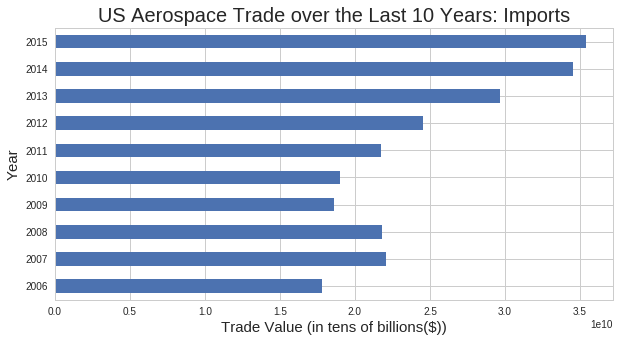

In [26]:
importPlot = totalImports.plot(kind = 'barh', figsize=(10,5))
importPlot.set_xlabel('Trade Value (in tens of billions($))', fontsize=15)
importPlot.set_title('US Aerospace Trade over the Last 10 Years: Imports', fontsize=20)
importPlot.set_ylabel('Year', fontsize=15)

### US Aerospace Exports

In [27]:
exports = new_aero_world[new_aero_world[FLOW] == 'Export']
grouped = exports.groupby([YEAR])
print('The Value of Aerospace Exports from the US per Year over the Last 10 Years:')
totalExports = grouped[VALUE].aggregate(sum)
totalExports

The Value of Aerospace Exports from the US per Year over the Last 10 Years:


Period
2006     67034295777
2007     76268011978
2008     72250010988
2009     83096968444
2010     79711355584
2011     87852841548
2012    104506413742
2013    115055160707
2014    125374187044
2015    131236269253
Name: Trade Value (US$), dtype: int64

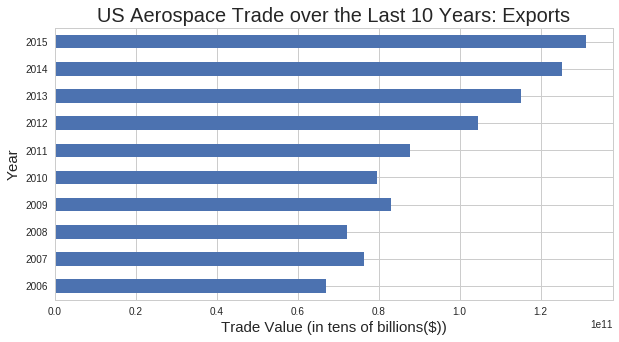

In [28]:
exportPlot = totalExports.plot(kind='barh', figsize=(10,5))
exportPlot.set_xlabel('Trade Value (in tens of billions($))', fontsize=15)
exportPlot.set_title('US Aerospace Trade over the Last 10 Years: Exports', fontsize=20)
exportPlot.set_ylabel('Year', fontsize=15)

### Aerospace Surplus per Year

In [29]:
# recession had little to no effect!

In [33]:
surplus = totalExports - totalImports

In [35]:
print('The Value of the US Aerospace Trade Surplus Over the Last 10 Years')
surplus

The Value of the US Aerospace Trade Surplus Over the Last 10 Years


Period
2006    49247989279
2007    54200034493
2008    50427146051
2009    64494935262
2010    60679846532
2011    66105415149
2012    79971786155
2013    85362571659
2014    90840621674
2015    95833687352
Name: Trade Value (US$), dtype: int64

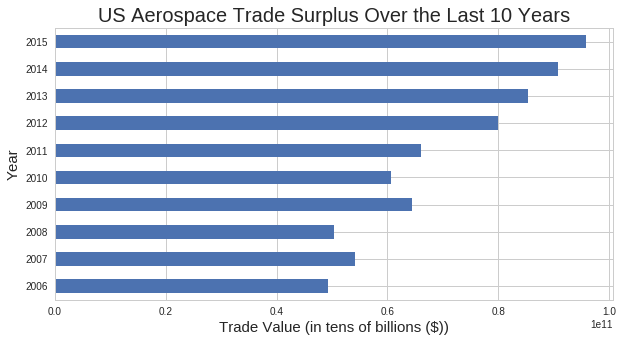

In [37]:
surplusPlot = surplus.plot(kind='barh',figsize=(10,5))
surplusPlot.set_xlabel('Trade Value (in tens of billions ($))', fontsize=15)
surplusPlot.set_title('US Aerospace Trade Surplus Over the Last 10 Years',fontsize=20)
surplusPlot.set_ylabel('Year',fontsize=15)

### Conclusions 

This article examined the global trade of the US aerospace industry from 2006 to 2015. The data focused on industry imports (goods) and exports (income).  The trade surplus for the industry over this time period was over 697 billion dollars.

The US aerospace industry basically doubled in this time frame, as clearly illustrated by the graphs. Exports nearly doubled from 67 billion dollars in 2006 to 131 billion dollars in 2015. Imports exactly doubled, from 17.7 billion dollars in 2006 to 35.4 billion in 2015. This suggest an annual average industry growth rate of about 20%. This growth was a major industry achievement.

What effect did the Great Recession have on the aerospace industry? Aerospace imports made a significant dip in 2009, the year after the recession hit. The trade value fell by 3.2 billions dollars. In other words, the industry consumed fewer foreign goods.

Aerospace exports grew, however, by 10.4 billion dollars from 2008 to 2009, but dipped a bit in 2010 by about 3.3 billion. In terms of industry income, the aerospace sector seems fairly recession proof.

This data illustrates what a massively successful industry US Aerospace is. It managed phenomenal growth and was barely slowed down by the worst economic crisis in decades. Aerospace has proven to be an essential part of the America economy.